In [7]:
from sentinelhub import DataCollection
import sentinelhub
#import oauth
from sentinelhub import SHConfig, BBox, CRS, SentinelHubRequest, MimeType

In [9]:
config = SHConfig()

config.instance_id = '2bd58351-ace4-4625-8bf5-f72e17a401ca'
config.sh_client_id = '6fd00be8-5651-44c6-9391-bc69a31c8c38'
config.sh_client_secret = 'nJ6;Y%N<mOeOJL-e4?YET*g3d(R~Y12cG*GP7&bv'
#onfig.instance_id = '2bd58351-ace4-4625-8bf5-f72e17a401ca'
#onfig.sh_client_id = 'e4d92f5b-f5dd-4d49-bf19-f32e6b4df011'
#onfig.sh_client_secret = 'c8114275-66c6-4c57-ba82-967674e62585'

if config.sh_client_id == "" or config.sh_client_secret == "":
    print("Warning! To use Sentinel Hub Catalog API, please provide the credentials (client ID and client secret).")

In [10]:
from sentinelhub import SentinelHubCatalog

catalog = SentinelHubCatalog(config=config)

catalog.get_info()

{'stac_version': '0.9.0',
 'stac_extensions': [],
 'id': 'sentinel-hub',
 'title': 'Sentinel Hub STAC catalog',
 'description': 'STAC v0.9.0 implementation by Sentinel Hub',
 'links': [{'href': 'https://services.sentinel-hub.com/api/v1/catalog/',
   'rel': 'self'},
  {'href': 'https://services.sentinel-hub.com/api/v1/catalog/conformance',
   'rel': 'conformance'},
  {'href': 'https://services.sentinel-hub.com/api/v1/catalog/search',
   'rel': 'search'},
  {'href': 'https://services.sentinel-hub.com/api/v1/catalog/collections',
   'rel': 'data'},
  {'href': 'https://services.sentinel-hub.com/api/v1/catalog/collections/sentinel-2-l1c',
   'rel': 'child'},
  {'href': 'https://services.sentinel-hub.com/api/v1/catalog/collections/planet-scorpius',
   'rel': 'child'},
  {'href': 'https://services.sentinel-hub.com/api/v1/catalog/collections/sentinel-1-grd',
   'rel': 'child'},
  {'href': 'https://services.sentinel-hub.com/api/v1/catalog/collections/sentinel-2-l2a',
   'rel': 'child'}]}

In [2]:
for collection in DataCollection.get_available_collections():
    print(collection)

DataCollection.SENTINEL2_L1C
DataCollection.SENTINEL2_L2A
DataCollection.SENTINEL1
DataCollection.SENTINEL1_IW
DataCollection.SENTINEL1_IW_ASC
DataCollection.SENTINEL1_IW_DES
DataCollection.SENTINEL1_EW
DataCollection.SENTINEL1_EW_ASC
DataCollection.SENTINEL1_EW_DES
DataCollection.SENTINEL1_EW_SH
DataCollection.SENTINEL1_EW_SH_ASC
DataCollection.SENTINEL1_EW_SH_DES
DataCollection.DEM
DataCollection.DEM_MAPZEN
DataCollection.DEM_COPERNICUS_30
DataCollection.DEM_COPERNICUS_90
DataCollection.MODIS
DataCollection.LANDSAT_MSS_L1
DataCollection.LANDSAT_TM_L1
DataCollection.LANDSAT_TM_L2
DataCollection.LANDSAT_ETM_L1
DataCollection.LANDSAT_ETM_L2
DataCollection.LANDSAT_OT_L1
DataCollection.LANDSAT_OT_L2
DataCollection.SENTINEL5P
DataCollection.SENTINEL3_OLCI
DataCollection.SENTINEL3_SLSTR


In [7]:
help(SentinelHubRequest)

Help on class SentinelHubRequest in module sentinelhub.sentinelhub_request:

class SentinelHubRequest(sentinelhub.sentinelhub_base_api.SentinelHubBaseApiRequest)
 |  SentinelHubRequest(evalscript, input_data, responses, bbox=None, geometry=None, size=None, resolution=None, **kwargs)
 |  
 |  Sentinel Hub Process API interface
 |  
 |  For more information check
 |  `Statistical API documentation <https://docs.sentinel-hub.com/api/latest/api/process/>`__.
 |  
 |  Method resolution order:
 |      SentinelHubRequest
 |      sentinelhub.sentinelhub_base_api.SentinelHubBaseApiRequest
 |      sentinelhub.data_request.DataRequest
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, evalscript, input_data, responses, bbox=None, geometry=None, size=None, resolution=None, **kwargs)
 |      For details of certain parameters check the
 |      `Process API reference <https://docs.sentinel-hub.com/api/latest/reference/#operation/process>`_.
 |      
 |     

In [32]:
caspian_sea_bbox = BBox([-91.53,16.49, -91.52, 16.50], crs=CRS.WGS84)
time_interval = "2019-01-01", "2019-03-01"

search_iterator = catalog.search(
    DataCollection.SENTINEL2_L1C,
    bbox=caspian_sea_bbox,
    time=time_interval,
#    query={"eo:cloud_cover": {"lt": 5}},
#    fields={"include": ["id", "properties.datetime", "properties.eo:cloud_cover"], "exclude": []},
)

results = list(search_iterator)
print("Total number of results:", len(results))

results

Total number of results: 12


[{'stac_version': '0.9.0',
  'stac_extensions': ['eo', 'projection'],
  'id': 'S2A_MSIL1C_20190227T163221_N0207_R083_T15QXU_20190227T200514',
  'type': 'Feature',
  'geometry': {'type': 'MultiPolygon',
   'crs': {'type': 'name',
    'properties': {'name': 'urn:ogc:def:crs:OGC::CRS84'}},
   'coordinates': [[[[-92.05964144364356, 17.18279176184525],
      [-92.06448197508712, 16.190371060766893],
      [-91.03763348064979, 16.183374048466277],
      [-91.02748604075016, 17.17534077706796],
      [-92.05964144364356, 17.18279176184525]]]]},
  'bbox': [-92.06448197508712,
   16.183374048466277,
   -91.02748604075016,
   17.18279176184525],
  'properties': {'datetime': '2019-02-27T16:53:47Z',
   'platform': 'sentinel-2a',
   'instruments': ['msi'],
   'constellation': 'sentinel-2',
   'eo:gsd': 10,
   'eo:cloud_cover': 54.11,
   'eo:bands': [{'name': 'B01',
     'common_name': 'coastal',
     'center_wavelength': 0.4427,
     'full_width_half_max': 0.021},
    {'name': 'B02',
     'common_n

In [37]:
[x['id'] for x in results]

['S2A_MSIL1C_20190227T163221_N0207_R083_T15QXU_20190227T200514',
 'S2B_MSIL1C_20190222T163309_N0207_R083_T15QXU_20190222T200306',
 'S2A_MSIL1C_20190217T163341_N0207_R083_T15QXU_20190217T195500',
 'S2B_MSIL1C_20190212T163409_N0207_R083_T15QXU_20190212T213529',
 'S2A_MSIL1C_20190207T163441_N0207_R083_T15QXU_20190207T195347',
 'S2B_MSIL1C_20190202T163509_N0207_R083_T15QXU_20190202T195938',
 'S2A_MSIL1C_20190128T163541_N0207_R083_T15QXU_20190128T195209',
 'S2B_MSIL1C_20190123T163559_N0207_R083_T15QXU_20190123T200403',
 'S2A_MSIL1C_20190118T163621_N0207_R083_T15QXU_20190118T195129',
 'S2B_MSIL1C_20190113T163639_N0207_R083_T15QXU_20190113T195504',
 'S2A_MSIL1C_20190108T163651_N0207_R083_T15QXU_20190108T195033',
 'S2B_MSIL1C_20190103T163659_N0207_R083_T15QXU_20190103T195452']

In [31]:
help(SentinelHubCatalog)

Help on class SentinelHubCatalog in module sentinelhub.sentinelhub_catalog:

class SentinelHubCatalog(sentinelhub.sh_utils.SentinelHubService)
 |  SentinelHubCatalog(config=None, base_url=None)
 |  
 |  The main class for interacting with Sentinel Hub Catalog API
 |  
 |  For more details about certain endpoints and parameters check
 |  `Catalog API documentation <https://docs.sentinel-hub.com/api/latest/api/catalog>`_.
 |  
 |  Method resolution order:
 |      SentinelHubCatalog
 |      sentinelhub.sh_utils.SentinelHubService
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  get_collection(self, collection)
 |      Provides information about given collection
 |      
 |      `Catalog API reference <https://docs.sentinel-hub.com/api/latest/reference/#operation/describeCollection>`__
 |      
 |      :param collection: A data collection object or a collection ID
 |      :type collection: DataCollection or str
 |      :return: Information about a collection
 |      :rtype: 

In [ ]:
collections = catalog.get_collections()

collections = [collection for collection in collections if not collection["id"].startswith(("byoc", "batch"))]

collections

In [24]:
catalog.get_feature(DataCollection.SENTINEL2_L2A,
                    "S2A_MSIL2A_20210125T073201_N0214_R049_T39TWK_20210125T105105")

{'stac_version': '0.9.0',
 'stac_extensions': ['eo', 'projection'],
 'id': 'S2A_MSIL2A_20210125T073201_N0214_R049_T39TWK_20210125T105105',
 'type': 'Feature',
 'geometry': {'type': 'MultiPolygon',
  'crs': {'type': 'name',
   'properties': {'name': 'urn:ogc:def:crs:OGC::CRS84'}},
  'coordinates': [[[[50.99975828238186, 45.15382824779532],
     [50.99976235468337, 44.16537549736596],
     [52.37288170686682, 44.15712570690993],
     [52.39639823709577, 45.14529082814174],
     [50.99975828238186, 45.15382824779532]]]]},
 'bbox': [50.99975828238186,
  44.15712570690993,
  52.39639823709577,
  45.15382824779532],
 'properties': {'datetime': '2021-01-25T07:37:20Z',
  'platform': 'sentinel-2a',
  'instruments': ['msi'],
  'constellation': 'sentinel-2',
  'eo:gsd': 10,
  'eo:cloud_cover': 0.59,
  'eo:bands': [{'name': 'B01',
    'common_name': 'coastal',
    'center_wavelength': 0.4427,
    'full_width_half_max': 0.021},
   {'name': 'B02',
    'common_name': 'blue',
    'center_wavelength': 

In [33]:
catalog.get_feature(DataCollection.SENTINEL2_L1C,
                    "S2A_MSIL1C_20190227T163221_N0207_R083_T15QXU_20190227T200514")

{'stac_version': '0.9.0',
 'stac_extensions': ['eo', 'projection'],
 'id': 'S2A_MSIL1C_20190227T163221_N0207_R083_T15QXU_20190227T200514',
 'type': 'Feature',
 'geometry': {'type': 'MultiPolygon',
  'crs': {'type': 'name',
   'properties': {'name': 'urn:ogc:def:crs:OGC::CRS84'}},
  'coordinates': [[[[-92.05964144364356, 17.18279176184525],
     [-92.06448197508712, 16.190371060766893],
     [-91.03763348064979, 16.183374048466277],
     [-91.02748604075016, 17.17534077706796],
     [-92.05964144364356, 17.18279176184525]]]]},
 'bbox': [-92.06448197508712,
  16.183374048466277,
  -91.02748604075016,
  17.18279176184525],
 'properties': {'datetime': '2019-02-27T16:53:47Z',
  'platform': 'sentinel-2a',
  'instruments': ['msi'],
  'constellation': 'sentinel-2',
  'eo:gsd': 10,
  'eo:cloud_cover': 54.11,
  'eo:bands': [{'name': 'B01',
    'common_name': 'coastal',
    'center_wavelength': 0.4427,
    'full_width_half_max': 0.021},
   {'name': 'B02',
    'common_name': 'blue',
    'center_wa

In [28]:
catalog.get_collection(DataCollection.SENTINEL2_L1C)

{'stac_version': '0.9.0',
 'id': 'sentinel-2-l1c',
 'title': 'Sentinel 2 L1C',
 'description': 'Sentinel 2 imagery processed to level 1C',
 'links': [{'href': 'https://services.sentinel-hub.com/api/v1/catalog/collections/sentinel-2-l1c',
   'rel': 'self'},
  {'href': 'https://services.sentinel-hub.com/api/v1/catalog/collections/sentinel-2-l1c/items',
   'rel': 'items'}],
 'license': 'proprietary',
 'providers': [{'name': 'ESA',
   'roles': ['producer'],
   'url': 'https://esa.int/'},
  {'name': 'AWS', 'roles': ['host'], 'url': 'https://aws.amazon.com/'},
  {'name': 'Sinergise',
   'roles': ['processor'],
   'url': 'https://www.sinergise.com/'}],
 'extent': {'spatial': {'bbox': [[-180.0, -56.0, 180.0, 83.0]]},
  'temporal': {'interval': [['2015-11-01T00:00:00Z', None]]}}}

In [8]:
chiapas_bbox = [-92.06448197508712,
          16.183374048466277,
          -91.02748604075016,
          17.18279176184525]

In [19]:
chiapas_bbox_0 = [-91.51,
          16.9,
          -91.5,
          17]

In [66]:
chiapas_bbox_0 = [-92.1,
          16.2,
          -91.03,
          17.15]

In [67]:
chiapas_bbox = BBox(chiapas_bbox_0,
                    crs=CRS.WGS84)

In [68]:
time_interval = "2019-01-01", "2019-03-01"

search_iterator = catalog.search(
    DataCollection.SENTINEL2_L2A,
    bbox=chiapas_bbox,
    time=time_interval,
    query={"eo:cloud_cover": {"lt": 5}},
    fields={"include": ["id",
                        "properties.datetime",
                        "properties.eo:cloud_cover"],
            "exclude": []},
)

results = list(search_iterator)
print("Total number of results:", len(results))

results

Total number of results: 65


[{'id': 'S2A_MSIL2A_20190227T163221_N0211_R083_T15PWT_20190227T203936',
  'properties': {'datetime': '2019-02-27T17:05:28Z', 'eo:cloud_cover': 0.36}},
 {'id': 'S2A_MSIL2A_20190227T163221_N0211_R083_T15QWV_20190227T203936',
  'properties': {'datetime': '2019-02-27T17:02:59Z', 'eo:cloud_cover': 0.46}},
 {'id': 'S2A_MSIL2A_20190227T163221_N0211_R083_T15QWU_20190227T203936',
  'properties': {'datetime': '2019-02-27T16:58:34Z', 'eo:cloud_cover': 2.24}},
 {'id': 'S2A_MSIL2A_20190227T163221_N0211_R083_T15QYV_20190227T203936',
  'properties': {'datetime': '2019-02-27T16:54:10Z', 'eo:cloud_cover': 2.82}},
 {'id': 'S2B_MSIL2A_20190222T163309_N0211_R083_T15PWT_20190222T203754',
  'properties': {'datetime': '2019-02-22T17:03:07Z', 'eo:cloud_cover': 1.6}},
 {'id': 'S2B_MSIL2A_20190222T163309_N0211_R083_T15QWV_20190222T203754',
  'properties': {'datetime': '2019-02-22T17:00:39Z', 'eo:cloud_cover': 0.03}},
 {'id': 'S2B_MSIL2A_20190222T163309_N0211_R083_T15PYT_20190222T203754',
  'properties': {'datet

In [69]:
[x['id'] for x in results]

['S2A_MSIL2A_20190227T163221_N0211_R083_T15PWT_20190227T203936',
 'S2A_MSIL2A_20190227T163221_N0211_R083_T15QWV_20190227T203936',
 'S2A_MSIL2A_20190227T163221_N0211_R083_T15QWU_20190227T203936',
 'S2A_MSIL2A_20190227T163221_N0211_R083_T15QYV_20190227T203936',
 'S2B_MSIL2A_20190222T163309_N0211_R083_T15PWT_20190222T203754',
 'S2B_MSIL2A_20190222T163309_N0211_R083_T15QWV_20190222T203754',
 'S2B_MSIL2A_20190222T163309_N0211_R083_T15PYT_20190222T203754',
 'S2B_MSIL2A_20190222T163309_N0211_R083_T15QYU_20190222T203754',
 'S2B_MSIL2A_20190222T163309_N0211_R083_T15QWU_20190222T203754',
 'S2B_MSIL2A_20190222T163309_N0211_R083_T15PXT_20190222T203754',
 'S2B_MSIL2A_20190222T163309_N0211_R083_T15QYV_20190222T203754',
 'S2B_MSIL2A_20190222T163309_N0211_R083_T15QXV_20190222T203754',
 'S2B_MSIL2A_20190222T163309_N0211_R083_T15QXU_20190222T203754',
 'S2A_MSIL2A_20190217T163341_N0211_R083_T15PXT_20190217T204454',
 'S2A_MSIL2A_20190217T163341_N0211_R083_T15PYT_20190217T204454',
 'S2A_MSIL2A_20190217T163

In [70]:
time_difference = dt.timedelta(hours=1)

all_timestamps = search_iterator.get_timestamps()
unique_acquisitions = filter_times(all_timestamps, time_difference)

unique_acquisitions

[datetime.datetime(2019, 1, 3, 16, 48, 38, tzinfo=tzutc()),
 datetime.datetime(2019, 1, 8, 16, 48, 36, tzinfo=tzutc()),
 datetime.datetime(2019, 1, 13, 16, 48, 40, tzinfo=tzutc()),
 datetime.datetime(2019, 1, 18, 16, 48, 40, tzinfo=tzutc()),
 datetime.datetime(2019, 1, 23, 16, 48, 41, tzinfo=tzutc()),
 datetime.datetime(2019, 1, 28, 16, 48, 44, tzinfo=tzutc()),
 datetime.datetime(2019, 1, 30, 16, 39, tzinfo=tzutc()),
 datetime.datetime(2019, 2, 2, 16, 49, 16, tzinfo=tzutc()),
 datetime.datetime(2019, 2, 4, 16, 38, 57, tzinfo=tzutc()),
 datetime.datetime(2019, 2, 7, 16, 48, 37, tzinfo=tzutc()),
 datetime.datetime(2019, 2, 12, 16, 48, 44, tzinfo=tzutc()),
 datetime.datetime(2019, 2, 17, 16, 48, 37, tzinfo=tzutc()),
 datetime.datetime(2019, 2, 22, 16, 49, 13, tzinfo=tzutc()),
 datetime.datetime(2019, 2, 27, 16, 54, 10, tzinfo=tzutc())]

In [23]:
import datetime as dt

In [71]:
from sentinelhub import SentinelHubRequest, filter_times, bbox_to_dimensions, MimeType, SentinelHubDownloadClient

In [28]:
evalscript_true_color = """
    //VERSION=3
    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }
    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

In [58]:
unique_acquisitions

[datetime.datetime(2020, 12, 11, 7, 37, 6, tzinfo=tzutc()),
 datetime.datetime(2020, 12, 26, 7, 37, 4, tzinfo=tzutc()),
 datetime.datetime(2021, 1, 5, 7, 37, 9, tzinfo=tzutc()),
 datetime.datetime(2021, 1, 25, 7, 37, 5, tzinfo=tzutc())]

In [ ]:
evalscript_4_colors = """"
    //VERSION=3
    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04","B08"]
            }],
            output: {
                bands: 4
            }
        };
    }
    function evaluatePixel(sample) {
        return [sample.B08, sample.B04, sample.B03, sample.B02];
    }
"""

In [79]:
process_requests = []

for timestamp in unique_acquisitions:
    request = SentinelHubRequest(
        evalscript=evalscript_true_color,
        input_data=[
            SentinelHubRequest.input_data(
                data_collection=DataCollection.SENTINEL2_L2A,
                time_interval=(timestamp - time_difference, timestamp + time_difference),
            )
        ],
        responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
        bbox= chiapas_bbox,
#        size=bbox_to_dimensions(caspian_sea_bbox, 100),
        config=config,
    )
    process_requests.append(request)

In [80]:
%%time

client = SentinelHubDownloadClient(config=config)

download_requests = [request.download_list[0] for request in process_requests]

data = client.download(download_requests)

data[0].shape

Wall time: 8.94 s


(256, 256, 3)

In [81]:
len(data)

14

In [33]:
import matplotlib.pyplot as plt

import numpy as np

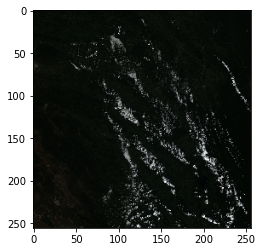

In [82]:
plt.imshow(data[0])

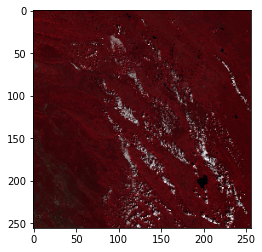

In [74]:
plt.imshow(data[0])

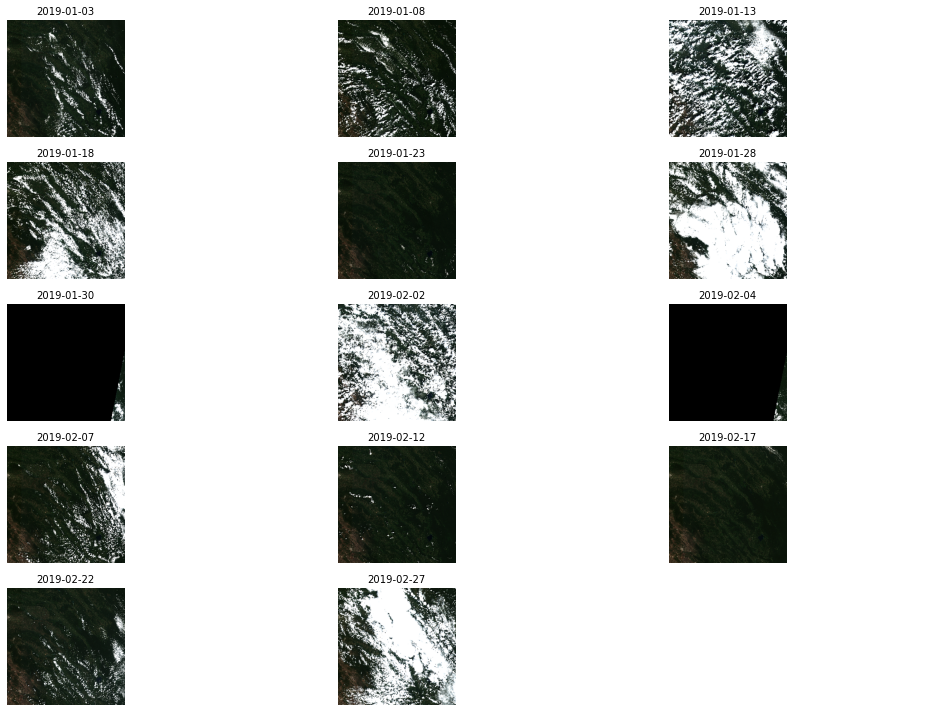

In [83]:
ncols, nrows = 3,5

fig, axis = plt.subplots(
    ncols=ncols, nrows=nrows, figsize=(15, 10), subplot_kw={"xticks": [], "yticks": [], "frame_on": False}
)

for idx, (image, timestamp) in enumerate(zip(data, unique_acquisitions)):
    ax = axis[idx // ncols][idx % ncols]
    ax.imshow(np.clip(image * 2.5 / 255, 0, 1))
    ax.set_title(timestamp.date().isoformat(), fontsize=10)

plt.tight_layout()

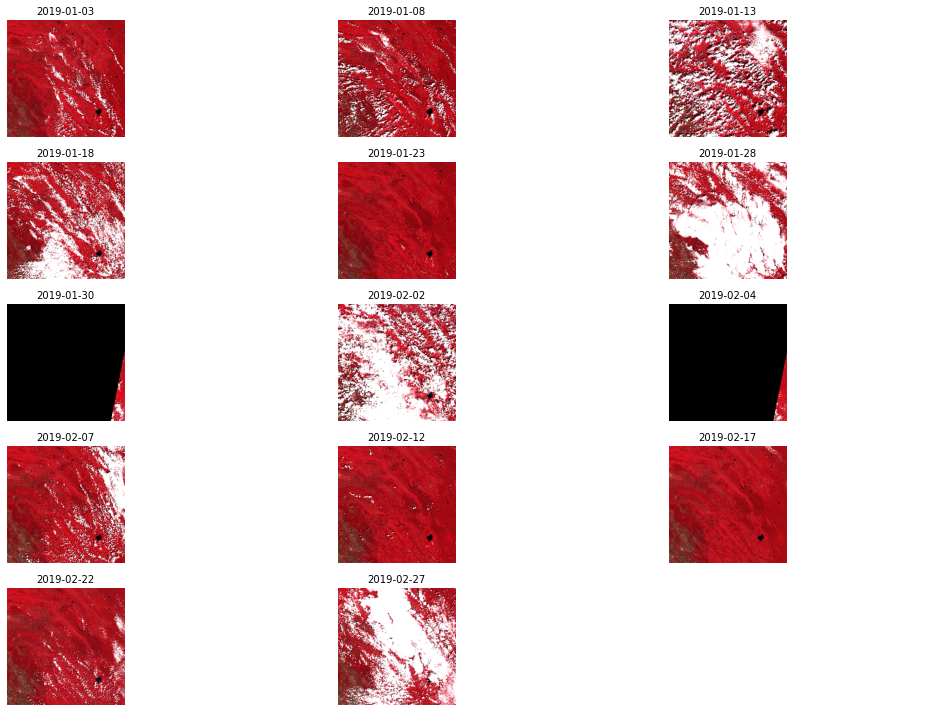

In [78]:
ncols, nrows = 3,5

fig, axis = plt.subplots(
    ncols=ncols, nrows=nrows, figsize=(15, 10), subplot_kw={"xticks": [], "yticks": [], "frame_on": False}
)

for idx, (image, timestamp) in enumerate(zip(data, unique_acquisitions)):
    ax = axis[idx // ncols][idx % ncols]
    ax.imshow(np.clip(image * 2.5 / 255, 0, 1))
    ax.set_title(timestamp.date().isoformat(), fontsize=10)

plt.tight_layout()

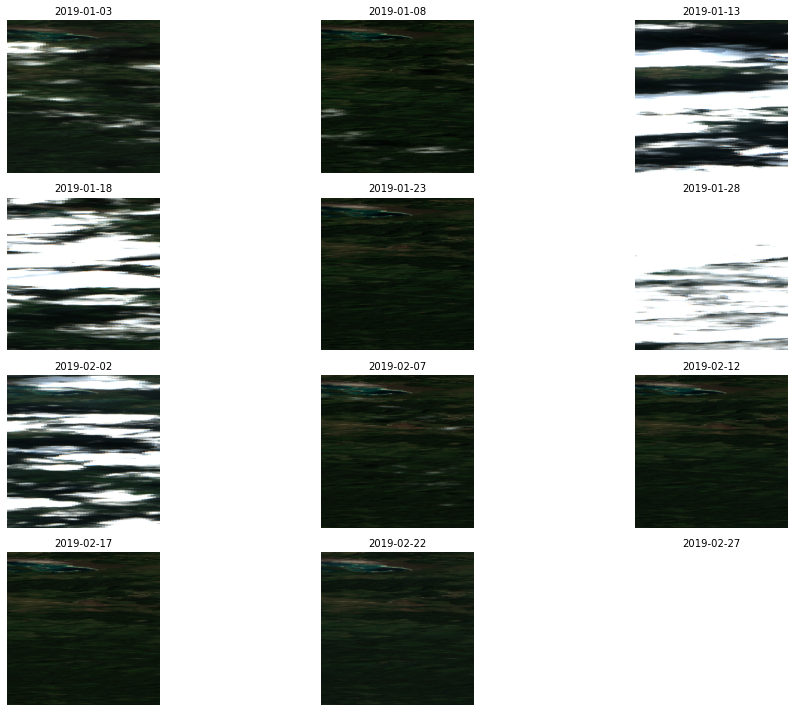

In [36]:
ncols, nrows = 3, 4

fig, axis = plt.subplots(
    ncols=ncols, nrows=nrows, figsize=(15, 10), subplot_kw={"xticks": [], "yticks": [], "frame_on": False}
)

for idx, (image, timestamp) in enumerate(zip(data, unique_acquisitions)):
    ax = axis[idx // ncols][idx % ncols]
    ax.imshow(np.clip(image * 2.5 / 255, 0, 1))
    ax.set_title(timestamp.date().isoformat(), fontsize=10)

plt.tight_layout()

In [39]:
evalscript_true_color = """
    //VERSION=3
    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }
    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

request = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A,
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    geometry=full_geometry,
    size=(512, 512),
    config=config,
)

image = request.get_data()[0]

plot_image(image, factor=3.5 / 255, clip_range=(0, 1))

NameError: name 'full_geometry' is not defined

In [41]:
caspian_sea_bbox = BBox([49.9604, 44.7176, 51.0481, 45.2324], crs=CRS.WGS84)

In [46]:
caspian_sea_bbox = BBox([49.9604, 44.7176, 51.0481, 45.2324], crs=CRS.WGS84)
time_interval = "2020-12-10", "2021-02-01"

search_iterator = catalog.search(
    DataCollection.SENTINEL2_L2A,
    bbox=caspian_sea_bbox,
    time=time_interval,
    query={"eo:cloud_cover": {"lt": 5}},
    fields={"include": ["id", "properties.datetime", "properties.eo:cloud_cover"], "exclude": []},
)

results = list(search_iterator)
print("Total number of results:", len(results))

results

Total number of results: 11


[{'id': 'S2A_MSIL2A_20210125T073201_N0214_R049_T39TVK_20210125T105105',
  'properties': {'datetime': '2021-01-25T07:37:23Z', 'eo:cloud_cover': 3.84}},
 {'id': 'S2A_MSIL2A_20210125T073201_N0214_R049_T39TWK_20210125T105105',
  'properties': {'datetime': '2021-01-25T07:37:20Z', 'eo:cloud_cover': 0.59}},
 {'id': 'S2A_MSIL2A_20210125T073201_N0214_R049_T39TVL_20210125T105105',
  'properties': {'datetime': '2021-01-25T07:37:09Z', 'eo:cloud_cover': 0.0}},
 {'id': 'S2A_MSIL2A_20210125T073201_N0214_R049_T39TWL_20210125T105105',
  'properties': {'datetime': '2021-01-25T07:37:05Z', 'eo:cloud_cover': 0.05}},
 {'id': 'S2A_MSIL2A_20210105T073311_N0214_R049_T39TVK_20210105T100353',
  'properties': {'datetime': '2021-01-05T07:37:23Z', 'eo:cloud_cover': 0.33}},
 {'id': 'S2A_MSIL2A_20210105T073311_N0214_R049_T39TVL_20210105T100353',
  'properties': {'datetime': '2021-01-05T07:37:09Z', 'eo:cloud_cover': 3.42}},
 {'id': 'S2A_MSIL2A_20201226T073321_N0214_R049_T39TWK_20201226T103718',
  'properties': {'datet

In [47]:
from sentinelhub import SentinelHubRequest, filter_times, bbox_to_dimensions, MimeType, SentinelHubDownloadClient


time_difference = dt.timedelta(hours=1)

all_timestamps = search_iterator.get_timestamps()
unique_acquisitions = filter_times(all_timestamps, time_difference)

unique_acquisitions

[datetime.datetime(2020, 12, 11, 7, 37, 6, tzinfo=tzutc()),
 datetime.datetime(2020, 12, 26, 7, 37, 4, tzinfo=tzutc()),
 datetime.datetime(2021, 1, 5, 7, 37, 9, tzinfo=tzutc()),
 datetime.datetime(2021, 1, 25, 7, 37, 5, tzinfo=tzutc())]

In [48]:
false_color_evalscript = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B03", "B04", "B08"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B08, sample.B04, sample.B03];
    }
"""


process_requests = []

for timestamp in unique_acquisitions:
    request = SentinelHubRequest(
        evalscript=false_color_evalscript,
        input_data=[
            SentinelHubRequest.input_data(
                data_collection=DataCollection.SENTINEL2_L2A,
                time_interval=(timestamp - time_difference, timestamp + time_difference),
            )
        ],
        responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
        bbox=caspian_sea_bbox,
        size=bbox_to_dimensions(caspian_sea_bbox, 100),
        config=config,
    )
    process_requests.append(request)

In [49]:
%%time

client = SentinelHubDownloadClient(config=config)

download_requests = [request.download_list[0] for request in process_requests]

data = client.download(download_requests)

data[0].shape

Wall time: 3.32 s


(567, 861, 3)

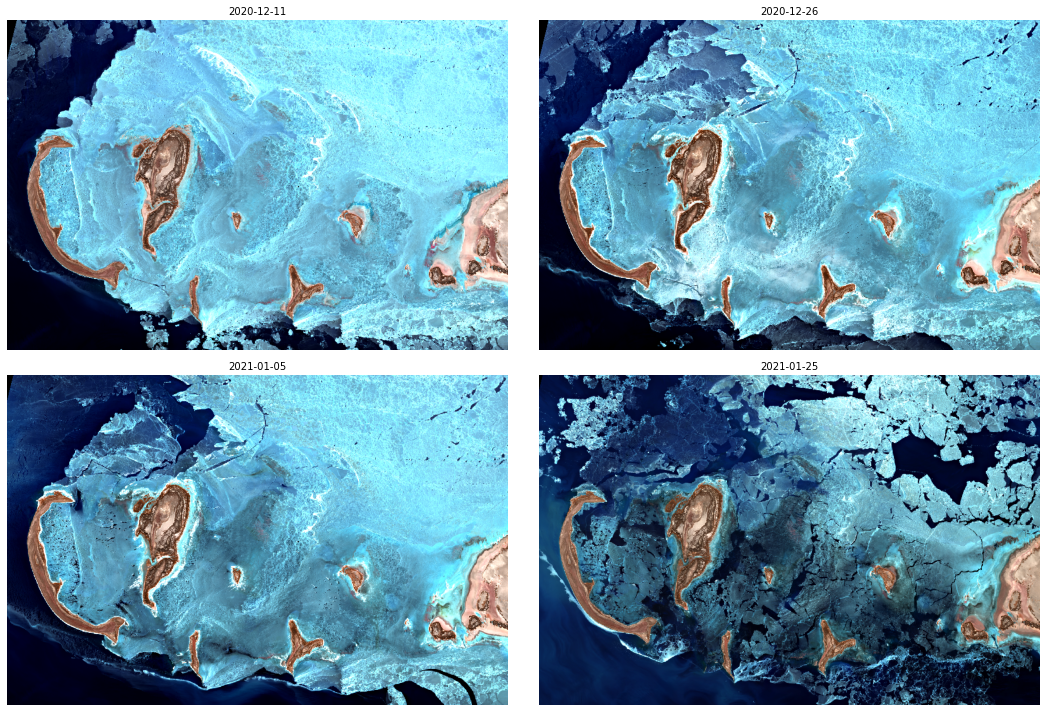

In [50]:
ncols, nrows = 2, 2

fig, axis = plt.subplots(
    ncols=ncols, nrows=nrows, figsize=(15, 10), subplot_kw={"xticks": [], "yticks": [], "frame_on": False}
)

for idx, (image, timestamp) in enumerate(zip(data, unique_acquisitions)):
    ax = axis[idx // ncols][idx % ncols]
    ax.imshow(np.clip(image * 2.5 / 255, 0, 1))
    ax.set_title(timestamp.date().isoformat(), fontsize=10)

plt.tight_layout()